In [65]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance, accuracy_score

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         pass
#         #print(os.path.join(dirname, filename))


In [66]:
data = pd.read_csv('taylor_swift_spotify.csv')
data.head()

Unnamed: 0                                           name   
0           0         Welcome To New York (Taylor's Version)  \
1           1                 Blank Space (Taylor's Version)   
2           2                       Style (Taylor's Version)   
3           3            Out Of The Woods (Taylor's Version)   
4           4  All You Had To Do Was Stay (Taylor's Version)   

                              album release_date  track_number   
0  1989 (Taylor's Version) [Deluxe]   2023-10-27             1  \
1  1989 (Taylor's Version) [Deluxe]   2023-10-27             2   
2  1989 (Taylor's Version) [Deluxe]   2023-10-27             3   
3  1989 (Taylor's Version) [Deluxe]   2023-10-27             4   
4  1989 (Taylor's Version) [Deluxe]   2023-10-27             5   

                       id                                   uri  acousticness   
0  4WUepByoeqcedHoYhSNHRt  spotify:track:4WUepByoeqcedHoYhSNHRt      0.009420  \
1  0108kcWLnn2HlH2kedi1gn  spotify:track:0108kcWLnn2HlH2kedi1gn      0.088500   
2  3Vpk1hfMAQme8VJ0SNRSkd  spotify:track:3Vpk1hfMAQme8VJ0SNRSkd      0.000421   
3  1OcSfkeCg9hRC2sFKB4IMJ  spotify:track:1OcSfkeCg9hRC2sFKB4IMJ      0.000537   
4  2k0ZEeAqzvYMcx9Qt5aClQ  spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ      0.000656   

   danceability  energy  instrumentalness  liveness  loudness  speechiness   
0         0.757   0.610          0.000037    0.3670    -4.840       0.0327  \
1         0.733   0.733          0.000000    0.1680    -5.376       0.0670   
2         0.511   0.822          0.019700    0.0899    -4.785       0.0397   
3         0.545   0.885          0.000056    0.3850    -5.968       0.0447   
4         0.588   0.721          0.000000    0.1310    -5.579       0.0317   

     tempo  valence  popularity  duration_ms  
0  116.998    0.685          79       212600  
1   96.057    0.701          79       231833  
2   94.868    0.305          80       231000  
3   92.021    0.206          79       235800  
4   96.997    0.520          78       193289

In [67]:
# Data cleaning

data["release_date"] = pd.to_datetime(data["release_date"])
data["year"] = data["release_date"].dt.year

# Let's discuss how to handle TV and other random editions like 3am
standard_albums = ['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989', 'reputation', 'Lover', 'folklore', 'evermore', 'Midnights']
standard_albums_data = data.loc[data['album'].isin(standard_albums)]

standard_albums_data.head()

Unnamed: 0                                    name      album   
108         108                           Lavender Haze  Midnights  \
109         109                                  Maroon  Midnights   
110         110                               Anti-Hero  Midnights   
111         111  Snow On The Beach (feat. Lana Del Rey)  Midnights   
112         112                 You're On Your Own, Kid  Midnights   

    release_date  track_number                      id   
108   2022-10-21             1  5jQI2r1RdgtuT8S3iG8zFC  \
109   2022-10-21             2  3eX0NZfLtGzoLUxPNvRfqm   
110   2022-10-21             3  0V3wPSX9ygBnCm8psDIegu   
111   2022-10-21             4  1wtOxkiel43cVs0Yux5Q4h   
112   2022-10-21             5  4D7BCuvgdJlYvlX5WlN54t   

                                      uri  acousticness  danceability  energy   
108  spotify:track:5jQI2r1RdgtuT8S3iG8zFC        0.2580         0.733   0.436  \
109  spotify:track:3eX0NZfLtGzoLUxPNvRfqm        0.0573         0.637   0.398   
110  spotify:track:0V3wPSX9ygBnCm8psDIegu        0.1300         0.637   0.643   
111  spotify:track:1wtOxkiel43cVs0Yux5Q4h        0.6900         0.663   0.319   
112  spotify:track:4D7BCuvgdJlYvlX5WlN54t        0.4010         0.696   0.396   

     instrumentalness  liveness  loudness  speechiness    tempo  valence   
108          0.000573     0.157   -10.489       0.0800   96.985   0.0976  \
109          0.000001     0.101    -8.294       0.0564  108.075   0.0374   
110          0.000002     0.142    -6.571       0.0519   97.008   0.5330   
111          0.000993     0.117   -13.481       0.0375  109.957   0.1930   
112          0.000005     0.125   -10.289       0.0656  120.041   0.3800   

     popularity  duration_ms  year  
108          85       202395  2022  
109          80       218270  2022  
110          92       200690  2022  
111          78       256124  2022  
112          85       194206  2022

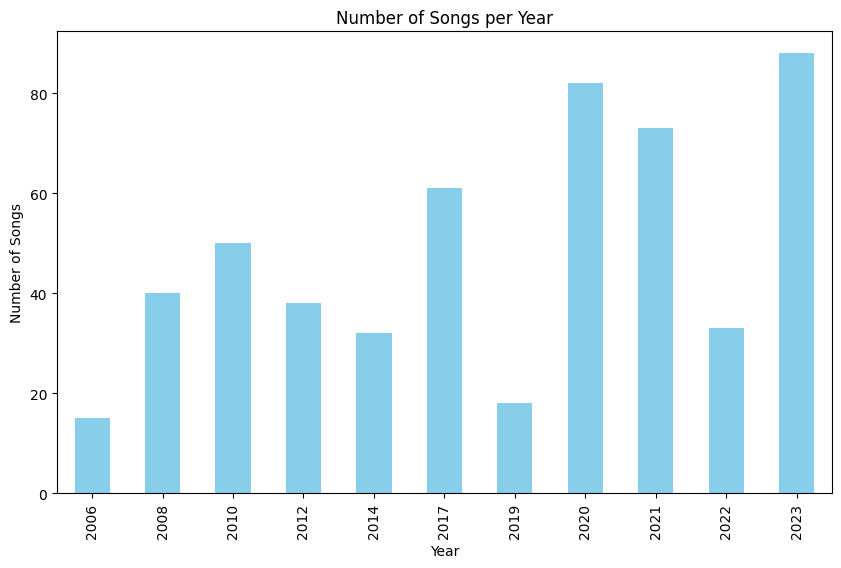

In [68]:
songs_per_year = data.groupby('year')['name'].count()

plt.figure(figsize=(10, 6))
songs_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

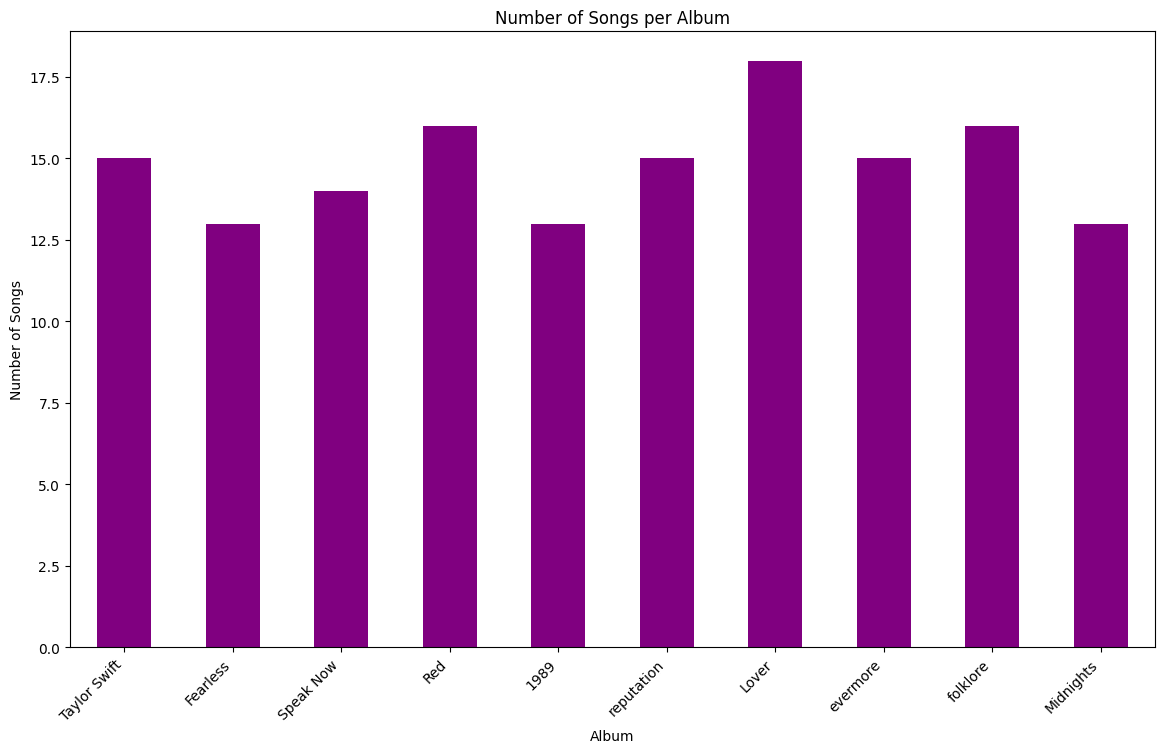

In [69]:
songs_per_album = standard_albums_data.groupby('album')['name'].count()

sorted_albums = standard_albums_data.sort_values('year')['album'].unique()

# Plotting
plt.figure(figsize=(14, 8))
songs_per_album.loc[sorted_albums].plot(kind='bar', color='purple')
plt.title('Number of Songs per Album')
plt.xlabel('Album')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


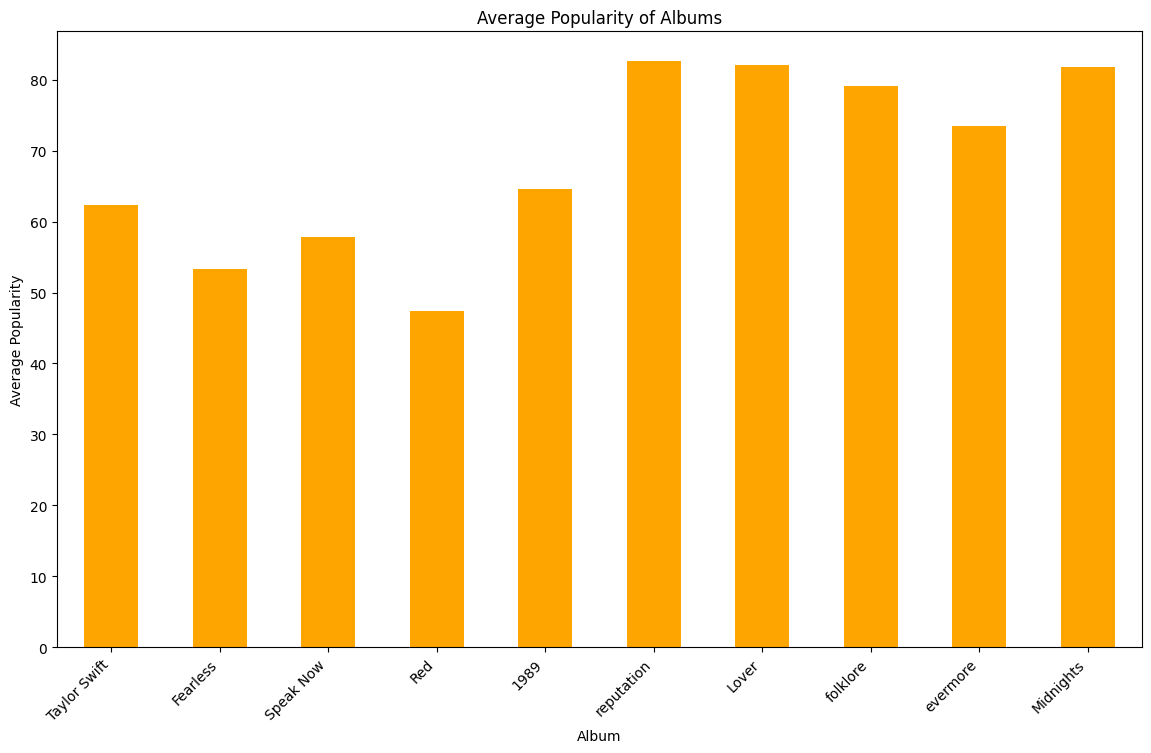

In [70]:
average_popularity_per_album = standard_albums_data.groupby('album')['popularity'].mean()

sorted_albums = standard_albums_data.sort_values(['year', 'popularity'], ascending=[True, False])['album'].unique()

plt.figure(figsize=(14, 8))
average_popularity_per_album.loc[sorted_albums].plot(kind='bar', color='orange')
plt.title('Average Popularity of Albums')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [71]:
standard_albums_data.head()
X = standard_albums_data[['album', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']]
y = standard_albums_data['popularity']

X = pd.get_dummies(X, columns=['album'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
names, mses, rmses, r2s = [], [], [], []

In [73]:
def show_metrics(y_test, y_pred, model_type):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    result = f'''
    {model_type} MSE  : {mse}
    {model_type} RMSE : {rmse} 
    {model_type} R^2  : {r2}
    '''
    
    names.append(model_type)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)
    
    print(result)

In [74]:
# Let's predict song popularity

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

show_metrics(y_test, lr_pred, "Linear Regression")


    Linear Regression MSE  : 44.26930923279463
    Linear Regression RMSE : 6.653518560340434 
    Linear Regression R^2  : 0.7461233986496714
    


In [76]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

show_metrics(y_test, rfr_pred, "Random Forest Regressor")


    Random Forest Regressor MSE  : 68.96463999999999
    Random Forest Regressor RMSE : 8.30449516828085 
    Random Forest Regressor R^2  : 0.6045000764642913
    


In [77]:
lyrics_data = pd.read_csv('/kaggle/input/taylor-swift-era-tour-dataset/lyrics_data.csv')
lyrics_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/taylor-swift-era-tour-dataset/lyrics_data.csv'

# Let's try to classify albums

In [ ]:
X = standard_albums_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
y = standard_albums_data['album']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=13)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.26666666666666666


This is clearly not a very good model! Songs can have similar metrics across albums. Let's think about what unifies albums - they're typically thematic. How can we get a sense of the themes in an album? Through lyrics!

In [ ]:
# need to find a good lyrics dataset if this is a route we wanna take

Let's analyze her entire discography instead of just the eras tour songs.

In [ ]:
import os
from pathlib import Path
import re

# album_data = pd.read_csv('/all_song_data/Albums.csv')

albums = []
songs = []
lyrics = []

standard_albums = ['TaylorSwift', 'Fearless_TaylorsVersion_', 'SpeakNow', 'Red_TaylorsVersion_', '1989', 'Reputation', 'Lover', 'Folklore', 'Evermore', 'Midnights_TheTillDawnEdition_']

for dirname, _, filenames in os.walk('all_song_data/Albums'):
    album_name = os.path.split(dirname)[-1]
    if album_name in standard_albums:
        for filename in filenames:
            albums.append(album_name)
            songs.append(Path(filename).stem)

            with open(os.path.join(dirname, filename), 'r', encoding='utf-8') as f:
                raw_lyrics = f.read()

            # Clean up the lyrics by replacing non-standard characters
            raw_lyrics = raw_lyrics.encode('ascii', 'replace').decode().replace('?', ' ')
            raw_lyrics = raw_lyrics.replace('\n', ' ')
            raw_lyrics = re.sub('(?!\n)\s+', ' ', raw_lyrics)
            
            # Remove any words between brackets (Chorus, etc.)
            pattern = re.compile(r'\[.*?\]')
            # Use sub() method to replace matched patterns with an empty string
            raw_lyrics = re.sub(pattern, '', raw_lyrics)
        
            # Remove lyrics header
            raw_lyrics = re.sub('.*Lyrics', '', raw_lyrics)

            # Remove end characters (number + 'Embed' or number + 'KEmbed')
            raw_lyrics = re.sub('[0-9]+KEmbed', '', raw_lyrics)
            raw_lyrics = re.sub('[0-9]+Embed', '', raw_lyrics)

            lyrics.append(raw_lyrics)

preprocessed_df = pd.DataFrame({'Album': albums, 'Song': songs, 'Lyrics': lyrics})
print(preprocessed_df.head())
# save to csv for testing purposes
# preprocessed_df.to_csv('out.csv')

<>:26: DeprecationWarning: invalid escape sequence '\s'
<>:26: DeprecationWarning: invalid escape sequence '\s'
/var/folders/1q/w9trgw5553vb5f14fsvqbnl40000gp/T/ipykernel_46573/3333522218.py:26: DeprecationWarning: invalid escape sequence '\s'
  raw_lyrics = re.sub('(?!\n)\s+', ' ', raw_lyrics)


                      Album                                   Song   
0  Fearless_TaylorsVersion_        TheWayILovedYou_TaylorsVersion_  \
1  Fearless_TaylorsVersion_                Fifteen_TaylorsVersion_   
2  Fearless_TaylorsVersion_  DontYou_TaylorsVersion__FromtheVault_   
3  Fearless_TaylorsVersion_  TheOtherSideoftheDoor_TaylorsVersion_   
4  Fearless_TaylorsVersion_           JumpThenFall_TaylorsVersion_   

                                              Lyrics  
0   He is sensible and so incredible And all my s...  
1   You take a deep breath and you walk through t...  
2   Hey, I knew I'd run into you somewhere It's b...  
3   In the heat of the fight I walked away Ignori...  
4   I like the way you sound in the mornin' We're...  


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


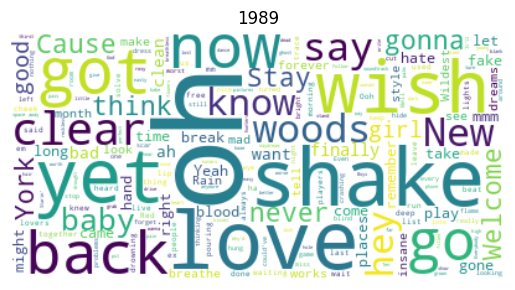

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


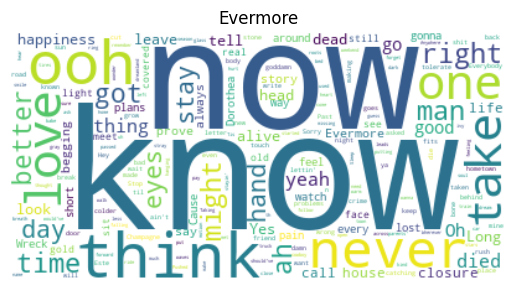

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


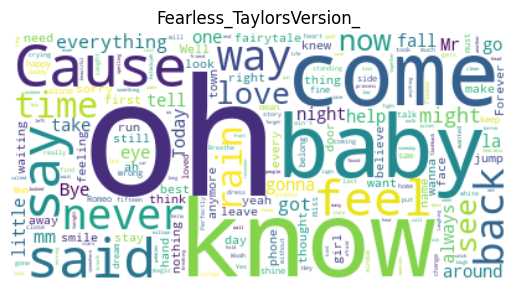

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


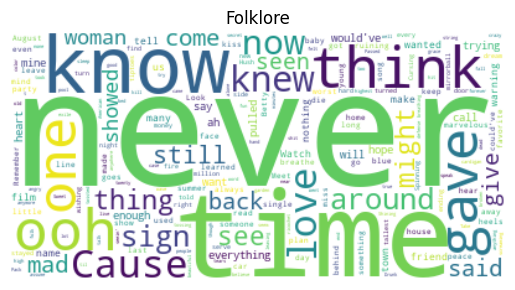

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


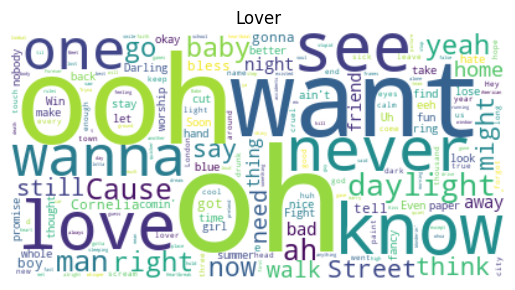

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


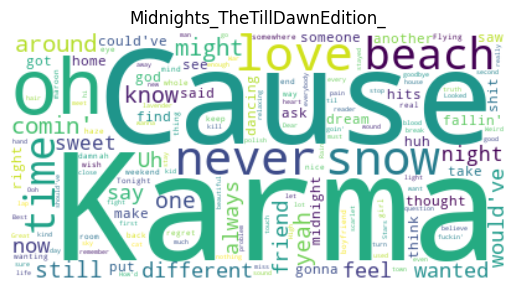

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


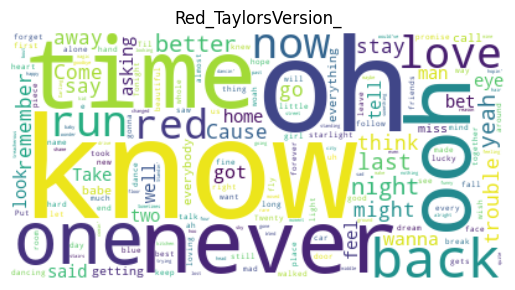

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


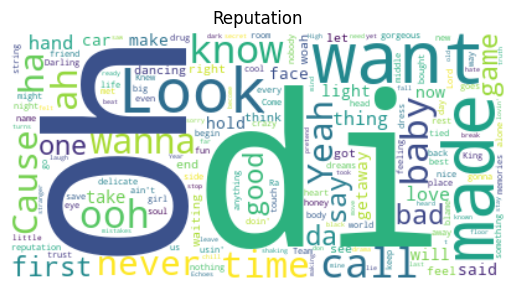

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


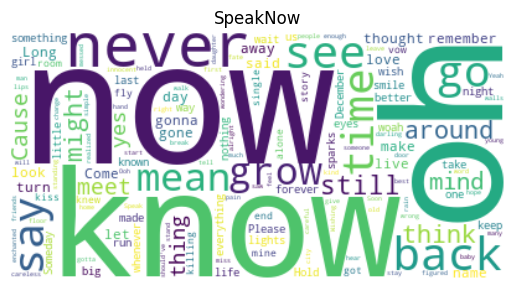

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


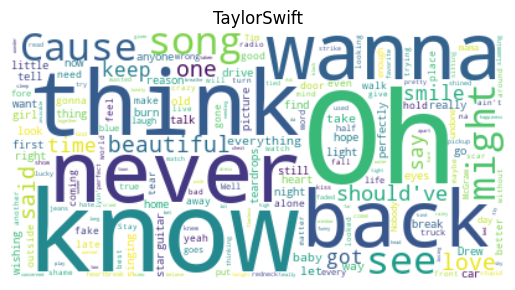

In [ ]:
# Create word cloud for sentiment analysis

# Clean data - remove missing values
preprocessed_df.dropna()

# Create word cloud and plot visualization for each album
from wordcloud import WordCloud
import matplotlib.pyplot as plt

album_group = preprocessed_df.groupby('Album')

for name, group in album_group:
    wordcloud = WordCloud(collocations = False, 
                          background_color = 'white').generate(' '.join(group['Lyrics']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(name)
    plt.axis("off")
    plt.show()

In [ ]:
# Sentiment analysis by album
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import requests
from termcolor import colored
# display results in an easy-to-interpret table. Postive = green, negative = red
from prettytable import PrettyTable
nltk.download('vader_lexicon')

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Song Title", "NLTK", "TextBlob"]

# # Download NLTK resources
# nltk.download('vader_lexicon')

# Function for sentiment analysis using NLTK's VADER sentiment analysis tool
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function for sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)

    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
# function to get the appropriate color for the given sentiment
def get_color(sentiment):
    if sentiment == 'Positive':
        return 'green'
    else:
        return 'red'

for name, group in album_group:
    
    songs = group.groupby('Song')
    
    for title, lyrics in songs:
    
        # Sentiment analysis using NLTK
        sentiment_nltk = analyze_sentiment_nltk(' '.join(lyrics['Lyrics']))
        nltk_color = get_color(sentiment_nltk)

        # Sentiment analysis using TextBlob
        sentiment_textblob = analyze_sentiment_textblob(' '.join(lyrics['Lyrics']))
        textblob_color = get_color(sentiment_textblob)

        row = [title, colored(sentiment_nltk, nltk_color), colored(sentiment_textblob, textblob_color)]
        table.add_row(row)
        
print(table)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/neetidesai/nltk_data...


+-----------------------------------------------------------+----------+----------+
|                         Song Title                        |   NLTK   | TextBlob |
+-----------------------------------------------------------+----------+----------+
|                       1989_Booklet_                       | Positive | Positive |
|                    AllYouHadtoDoWasStay                   | Positive | Positive |
|                          BadBlood                         | Negative | Negative |
|                         BlankSpace                        | Negative | Negative |
|                           Clean                           | Positive | Positive |
|                      HowYouGetTheGirl                     | Negative | Negative |
|                        IKnowPlaces                        | Negative | Negative |
|                       IWishYouWould                       | Negative | Positive |
|                       OutOfTheWoods                       | Positive | Pos

https://github.com/UtkarshRedd/Negation_handlingThe above results are okay, but not great. The basic idea behind sentiment analysis is that each word is analyze out of context (so for example, if the word 'important' is seen in Would've, Could've, Should've, it will be classified as positive even though in context the lyric is negative (But, Lord, you made me feel important/And then you tried to erase us)).

So, to fix this issue and get a more accurate sentiment analysis, we need to analyze words in context!

I will be using the code in this repo: https://github.com/UtkarshRedd/Negation_handling to do so.

In [ ]:
from nltk.corpus import wordnet
from termcolor import colored
# display results in an easy-to-interpret table. Postive = green, negative = red
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Song Title", "NLTK", "TextBlob", "NLTK Negation"]

def negation_handler(sentence):	
    temp = int(0)
    for i in range(len(sentence)):
        if sentence[i-1] in ['not',"n't"]:
            antonyms = []
            for syn in wordnet.synsets(sentence[i]):
                syns = wordnet.synsets(sentence[i])
                w1 = syns[0].name()
                temp = 0
                for l in syn.lemmas():
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                max_dissimilarity = 0
                for ant in antonyms:
                    syns = wordnet.synsets(ant)
                    w2 = syns[0].name()
                    syns = wordnet.synsets(sentence[i])
                    w1 = syns[0].name()
                    word1 = wordnet.synset(w1)
                    word2 = wordnet.synset(w2)
                    if isinstance(word1.wup_similarity(word2), float) or isinstance(word1.wup_similarity(word2), int):
                        temp = 1 - word1.wup_similarity(word2)
                    if temp>max_dissimilarity:
                        max_dissimilarity = temp
                        antonym_max = ant
                        sentence[i] = antonym_max
                        sentence[i-1] = ''
#     while '' in sentence:
#         sentence.remove('')
    return sentence


# Function for sentiment analysis using NLTK's VADER sentiment analysis tool
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
# function to get the appropriate color for the given sentiment
def get_color(sentiment):
    if sentiment == 'Positive':
        return 'green'
    else:
        return 'red'

for name, group in album_group:
    songs = group.groupby('Song')
    
    for title, lyrics in songs:
    
        # Sentiment analysis using NLTK
        sentiment_nltk = analyze_sentiment_nltk(' '.join(lyrics['Lyrics']))
        nltk_color = get_color(sentiment_nltk)

        # Sentiment analysis using TextBlob
        sentiment_textblob = analyze_sentiment_textblob(' '.join(lyrics['Lyrics']))
        textblob_color = get_color(sentiment_textblob)

        # Sentiment analysis using NLTK with negation handling
        lyrics = negation_handler(' '.join(lyrics['Lyrics']))
        sentiment_nltk_negation = analyze_sentiment_nltk(lyrics)
        nltk_negation_color = get_color(sentiment_nltk_negation)
        
        row = [title, colored(sentiment_nltk, nltk_color), colored(sentiment_textblob, textblob_color), colored(sentiment_nltk_negation, nltk_negation_color)]
        table.add_row(row)
        
print(table)

+-----------------------------------------------------------+----------+----------+---------------+
|                         Song Title                        |   NLTK   | TextBlob | NLTK Negation |
+-----------------------------------------------------------+----------+----------+---------------+
|                       1989_Booklet_                       | Positive | Positive |    Positive   |
|                    AllYouHadtoDoWasStay                   | Positive | Positive |    Positive   |
|                          BadBlood                         | Negative | Negative |    Negative   |
|                         BlankSpace                        | Negative | Negative |    Negative   |
|                           Clean                           | Positive | Positive |    Positive   |
|                      HowYouGetTheGirl                     | Negative | Negative |    Negative   |
|                        IKnowPlaces                        | Negative | Negative |    Negative   |


Did that work? I have no idea. #womeninstem

Now, I think I want to plot danceability, acousticness, etc. for specific songs in each album, to get a better visualization of song metrics and how they correspond to sentiment. I think linking variables like danceability and valence to NLTK sentiment analysis to get a more nuanced analysis of each song might be beneficial in the future, so this will be my first step.

In [ ]:
#List for tomorrow because I am very tired. I found a bunch of cool resources I want to implement for more complex analysis!

#TODO - plot topic-based modeling - I think this combined with sentiment analysis + spotify metric analysis could be interesting.
#TODO - find correlations between data in spotify dataset and ktlk analysis



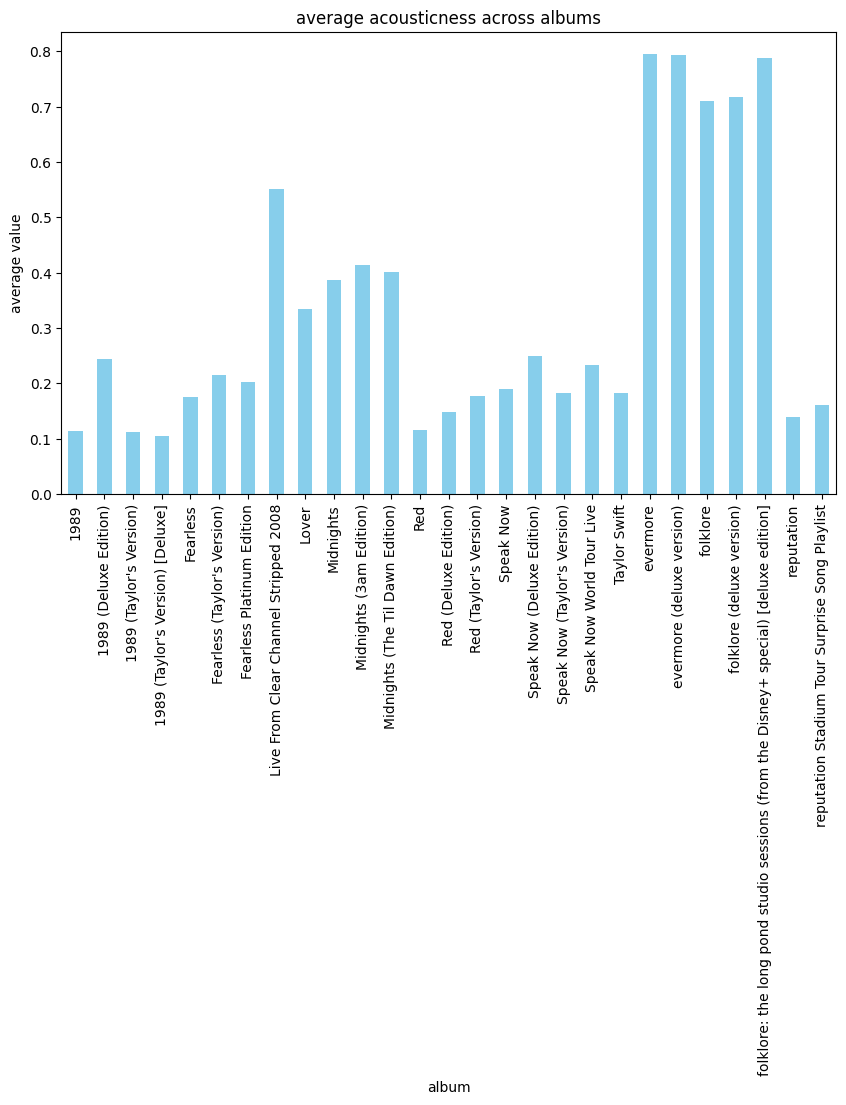

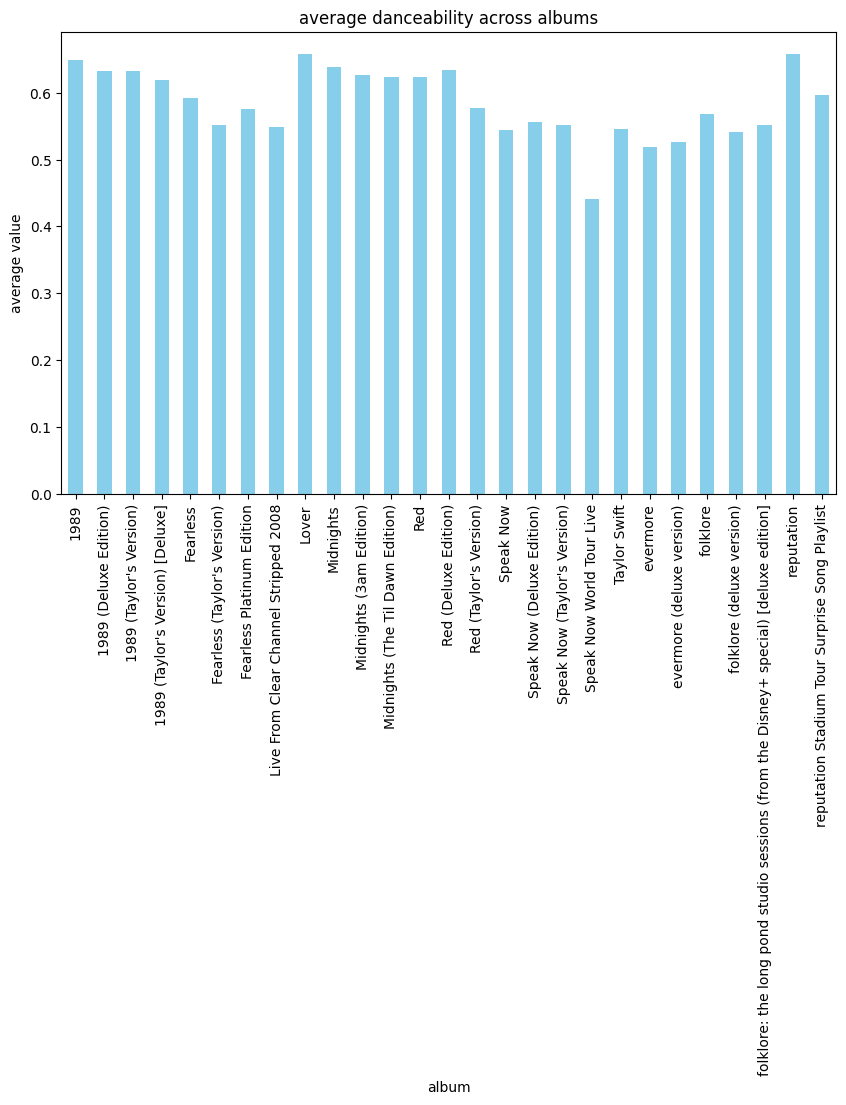

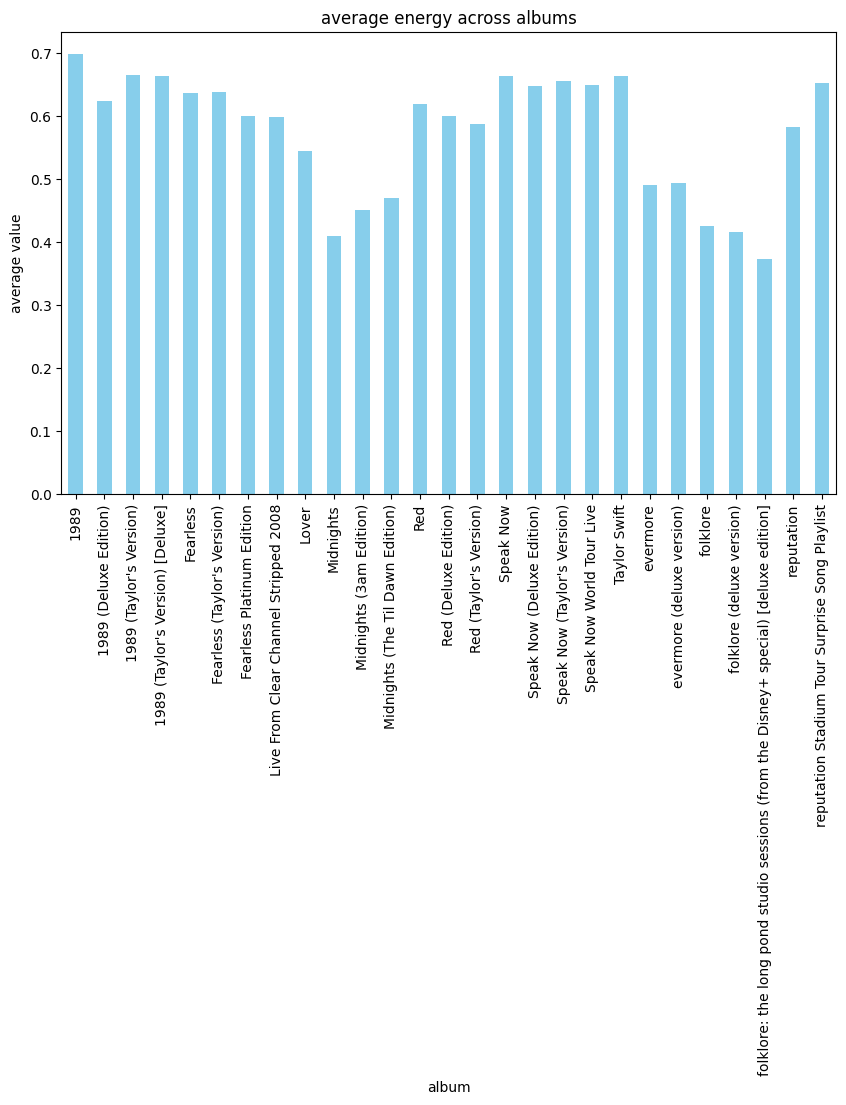

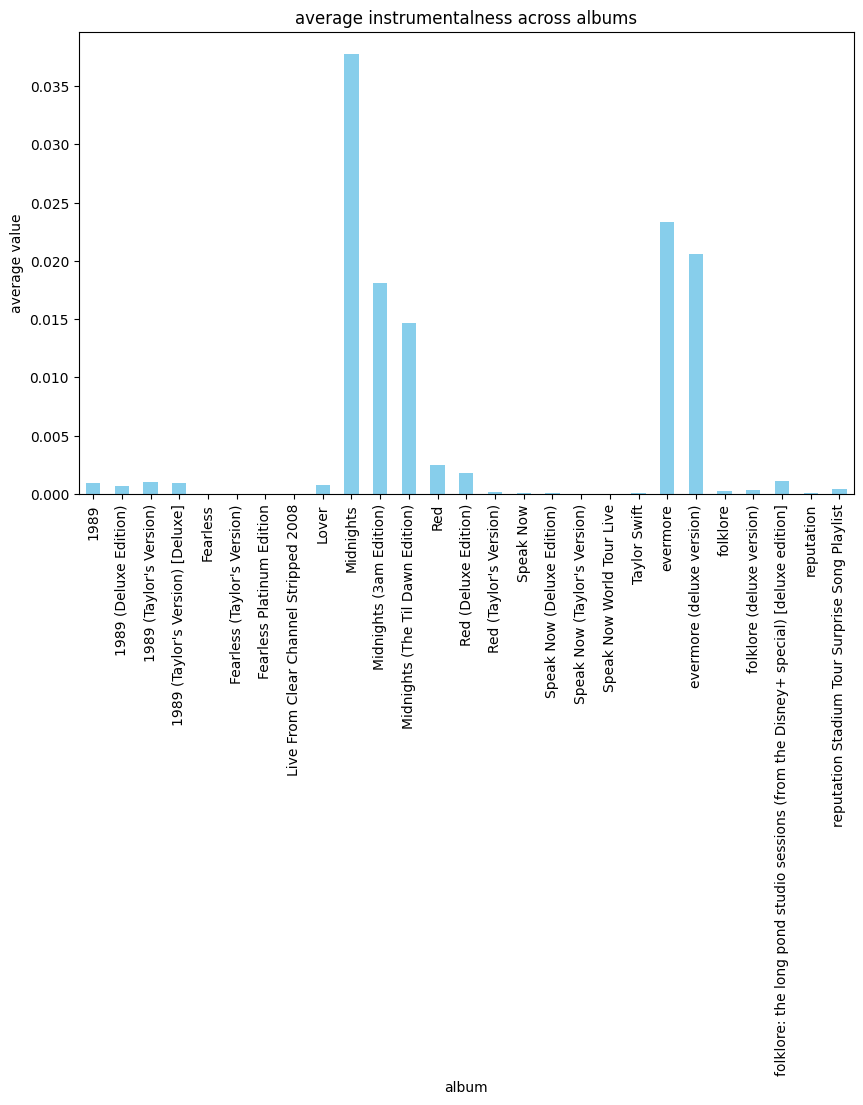

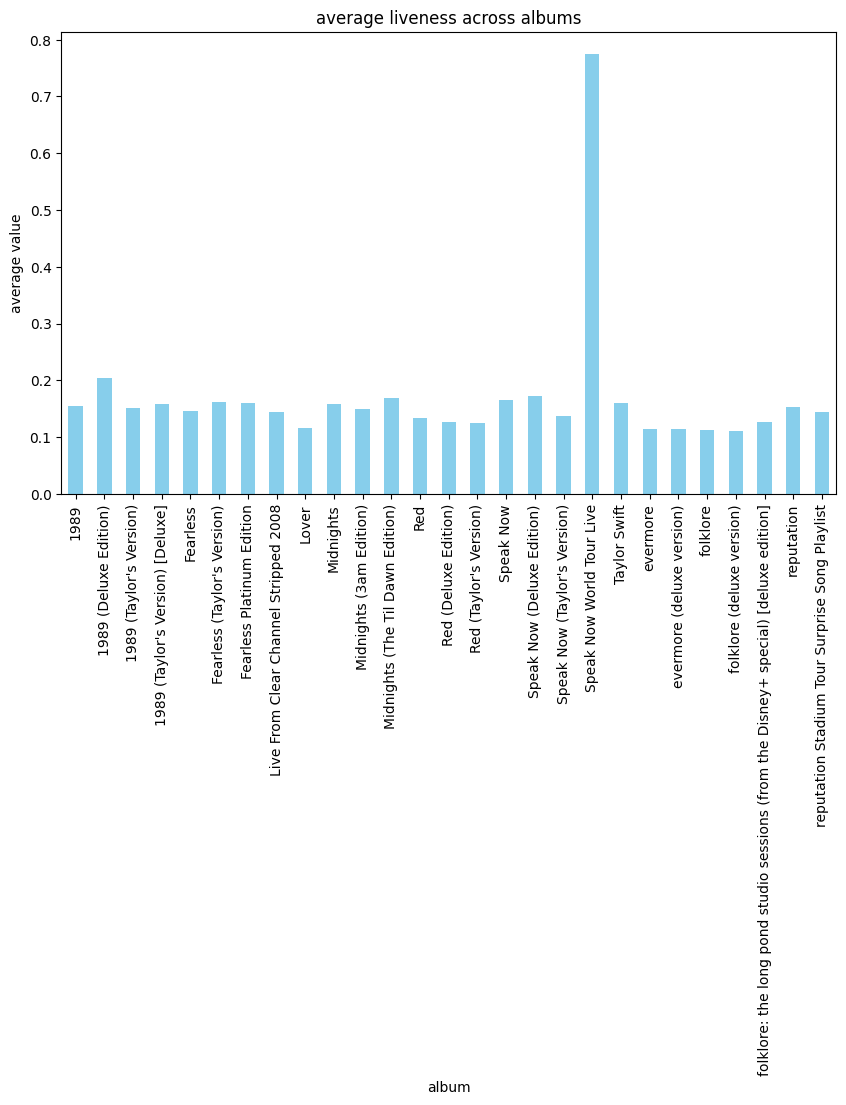

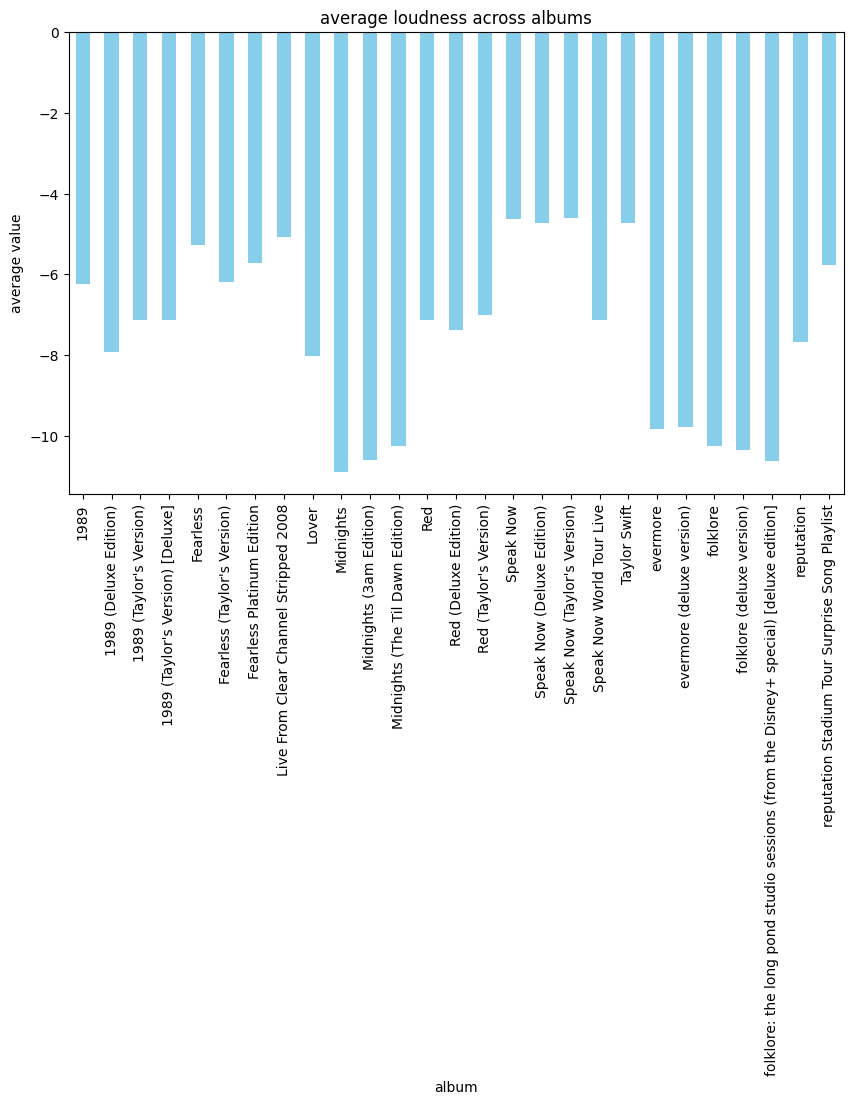

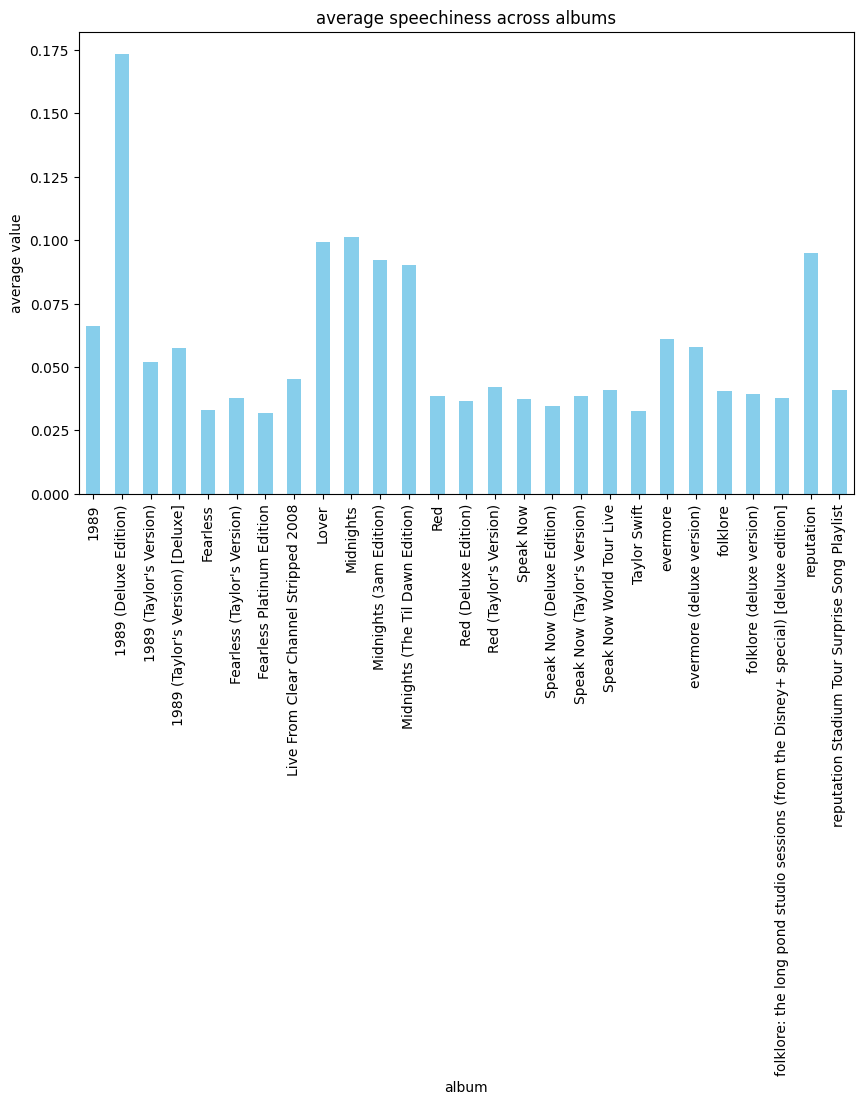

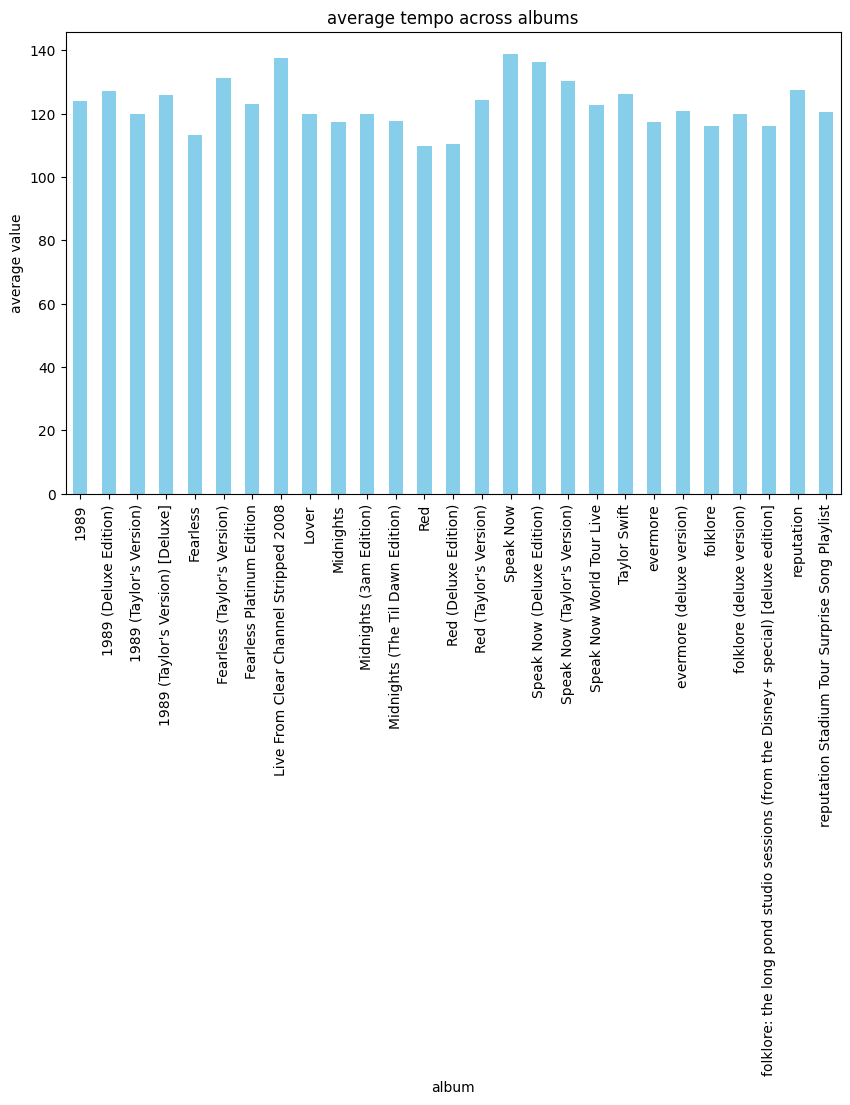

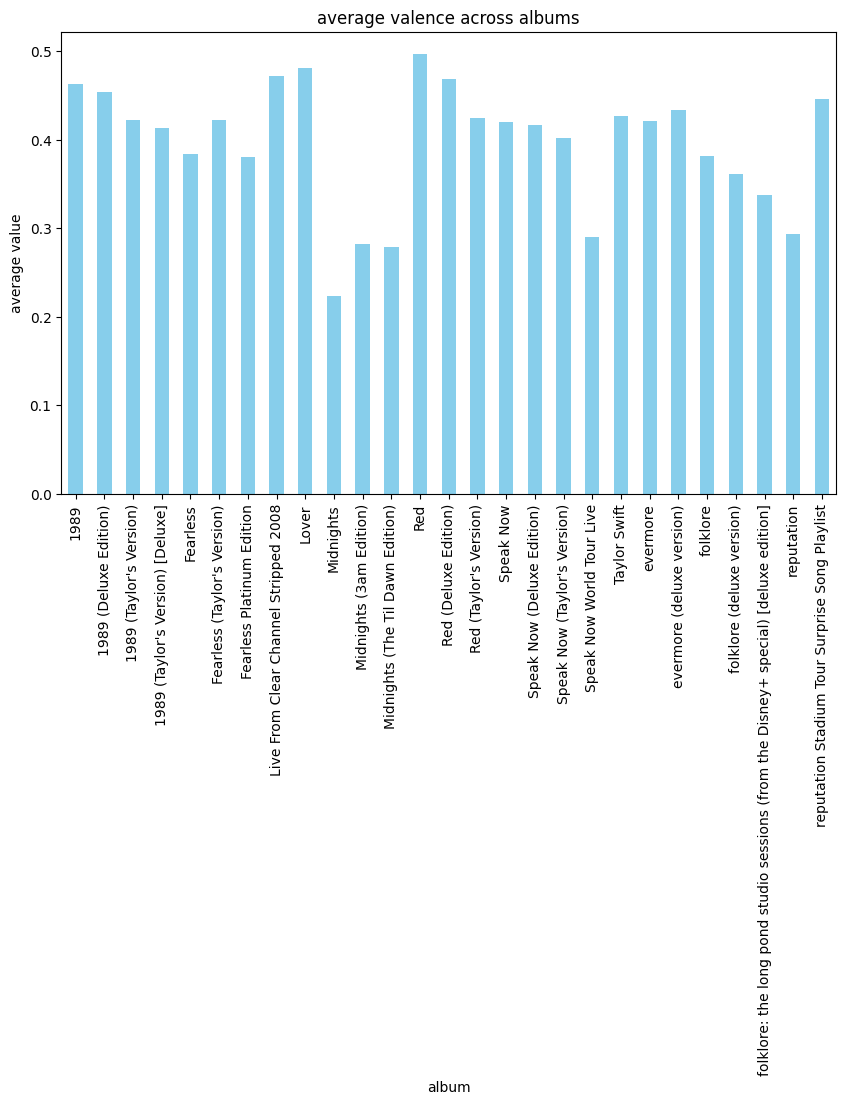

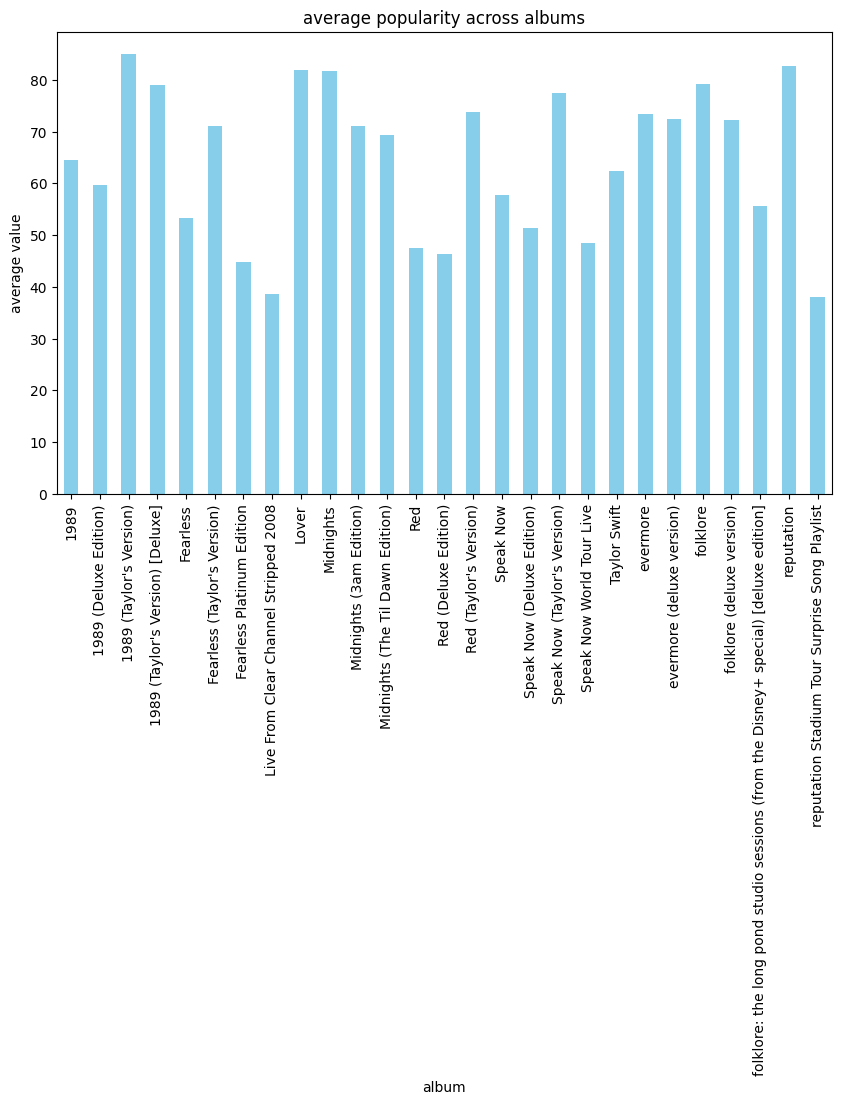

In [ ]:
# Step 1: Plot average danceability, acousticness, etc. across albums
data_per_album = data.groupby('album')

columns = data.columns[7:-2]

for c in columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'average {c} across albums')
    plt.ylabel('average value')  
    
    data_per_album = data.groupby('album')[c].mean()
    
    data_per_album.plot(kind='bar', color='skyblue')
    
    plt.show()


Ok, so a lot of albums are duplicated (deluxe version, etc). In order to prevent this sort of repetition, I'm going to filter out the duplicates and live versions of songs by taking the Taylor's Version of each album, and taking the version with the most songs (most deluxe tracks). If there is not a Taylor's Version of an album, I will just take the longest version of that album. For now I'm just hardcoding it.

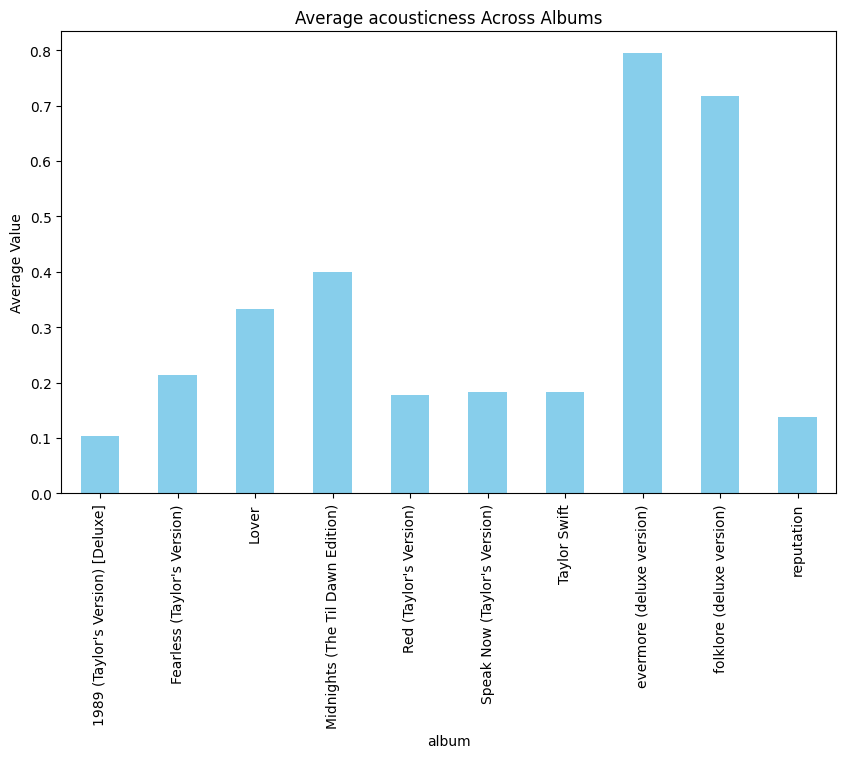

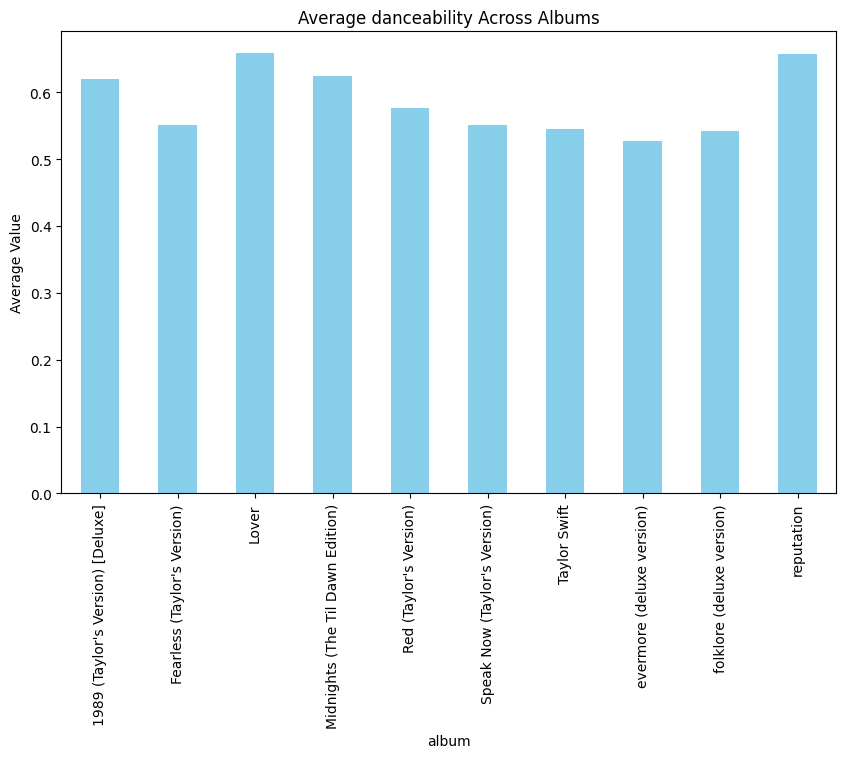

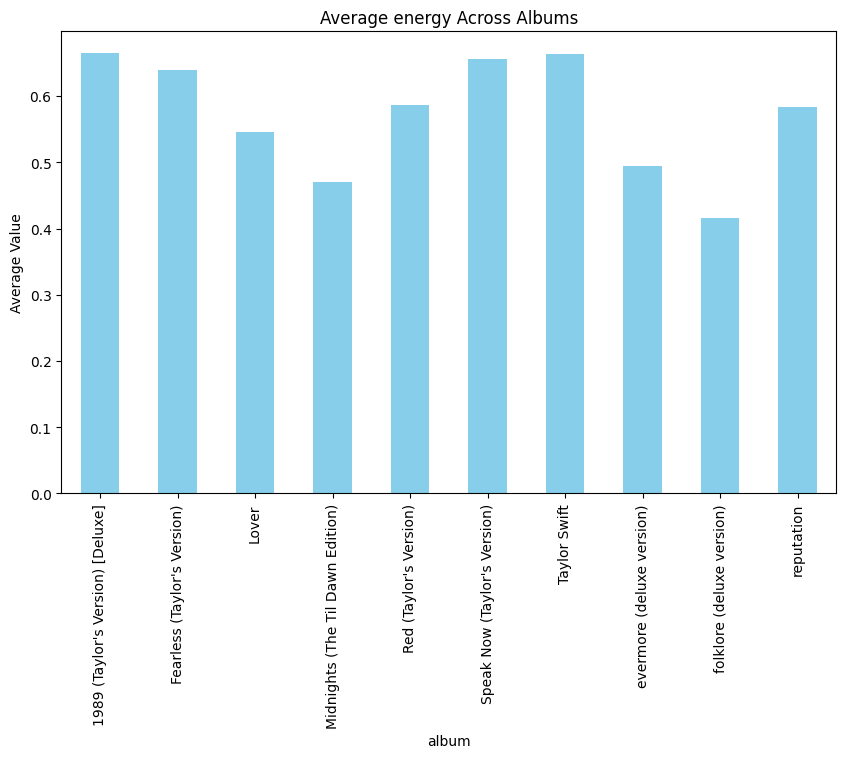

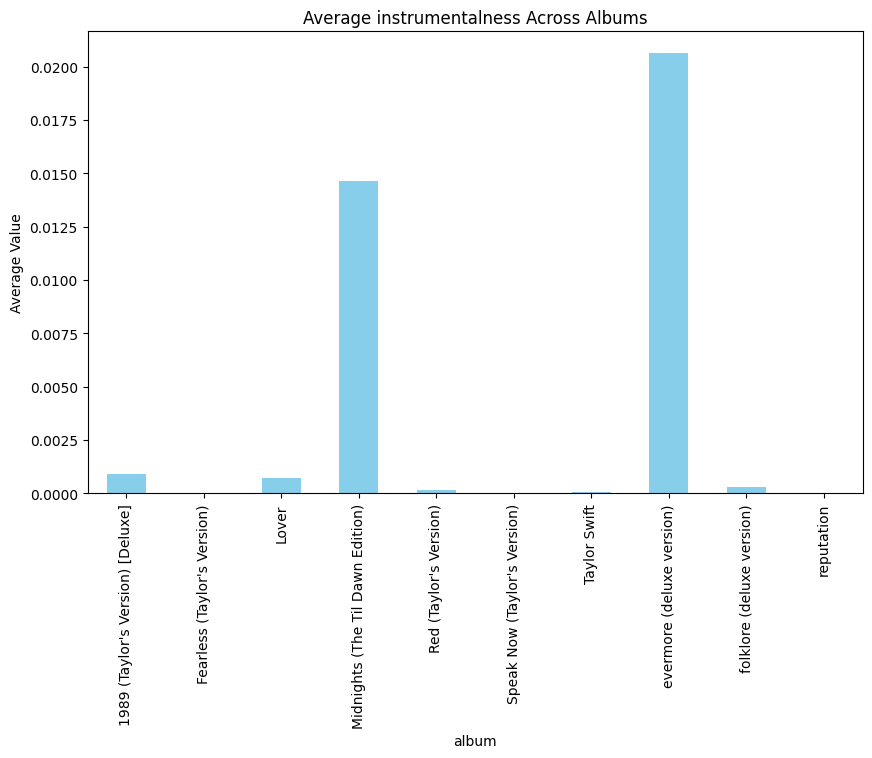

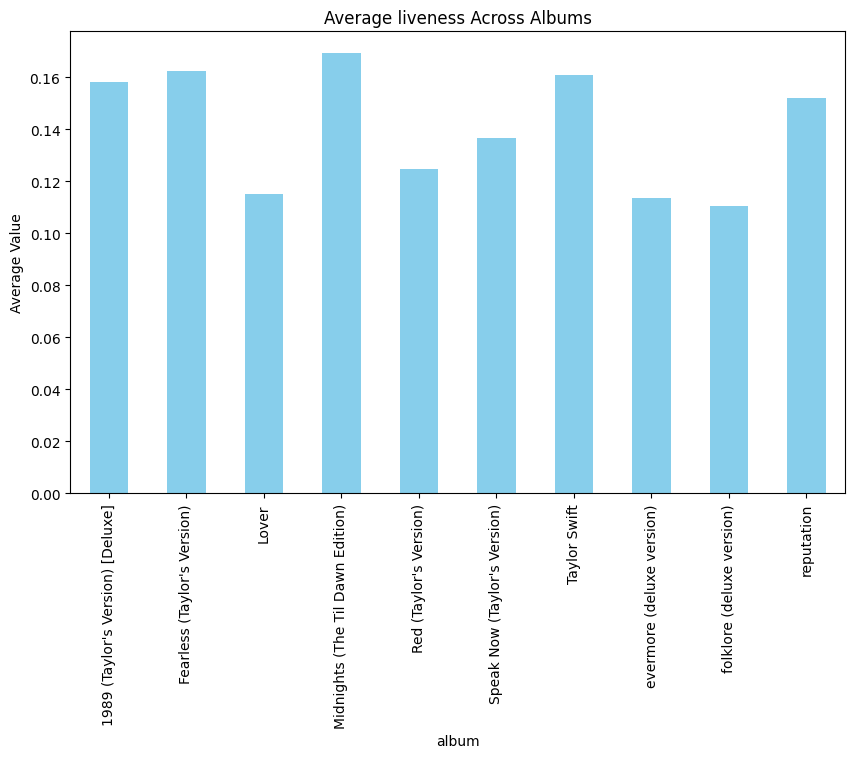

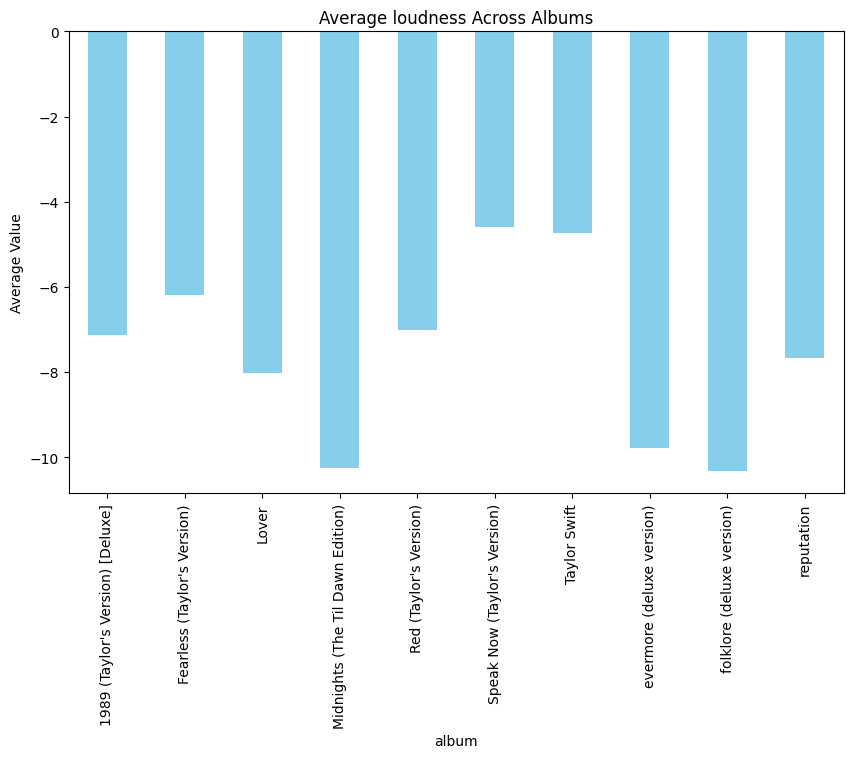

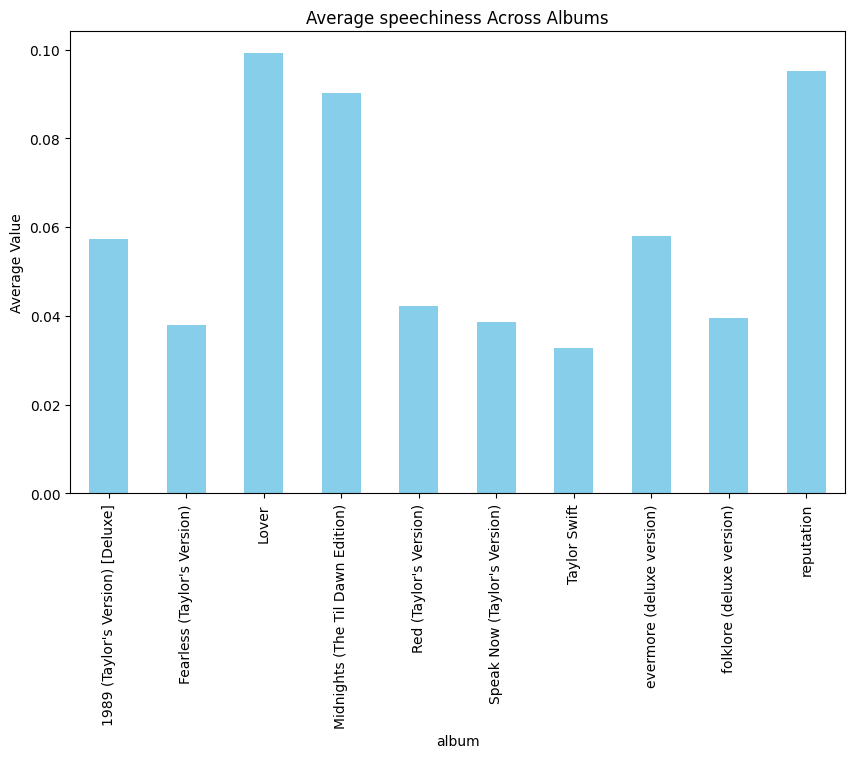

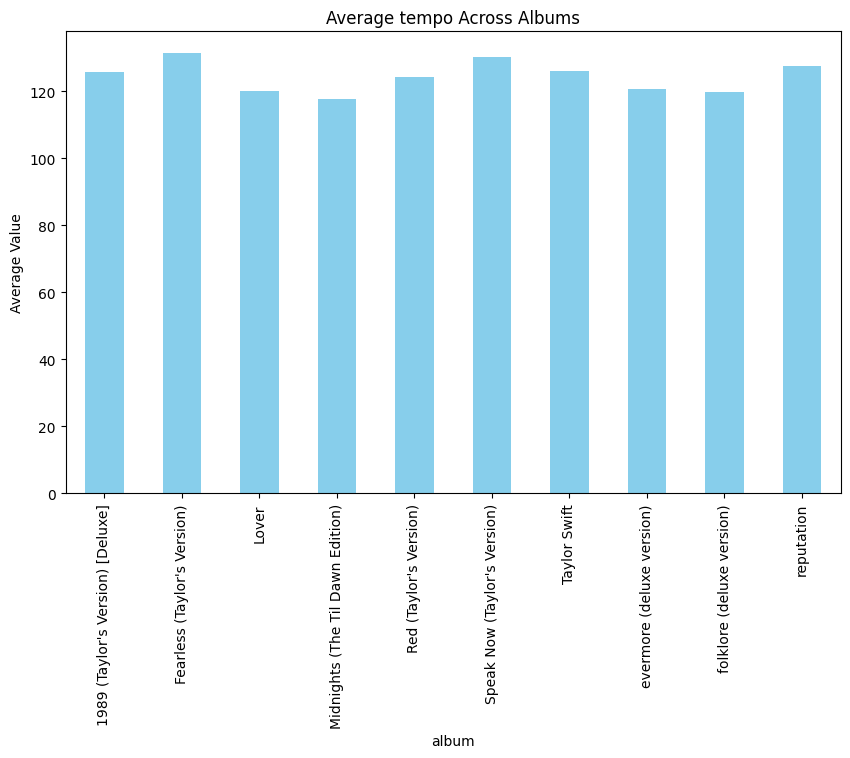

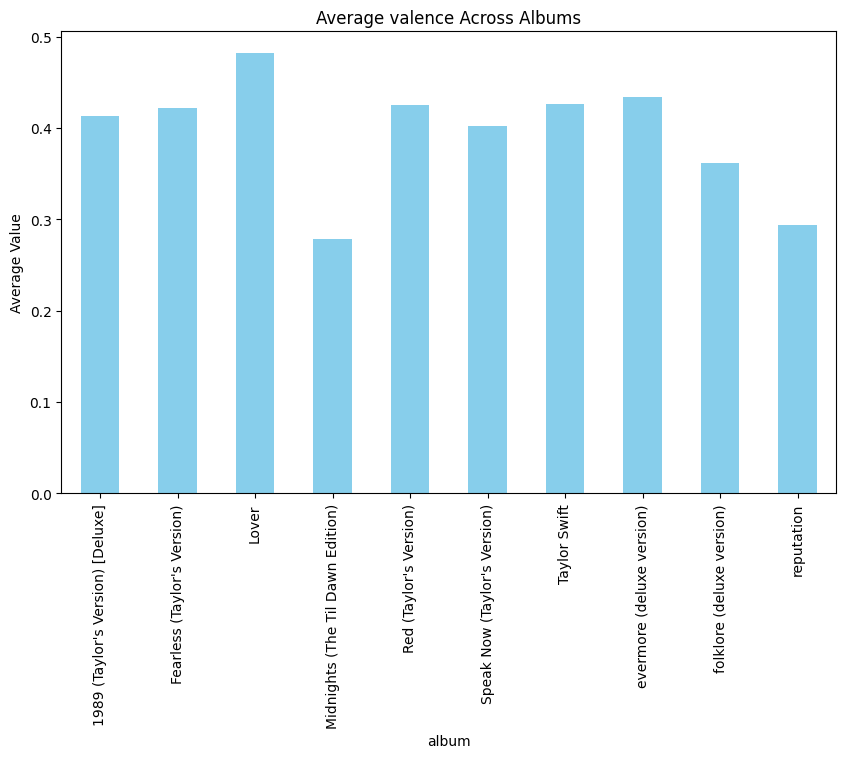

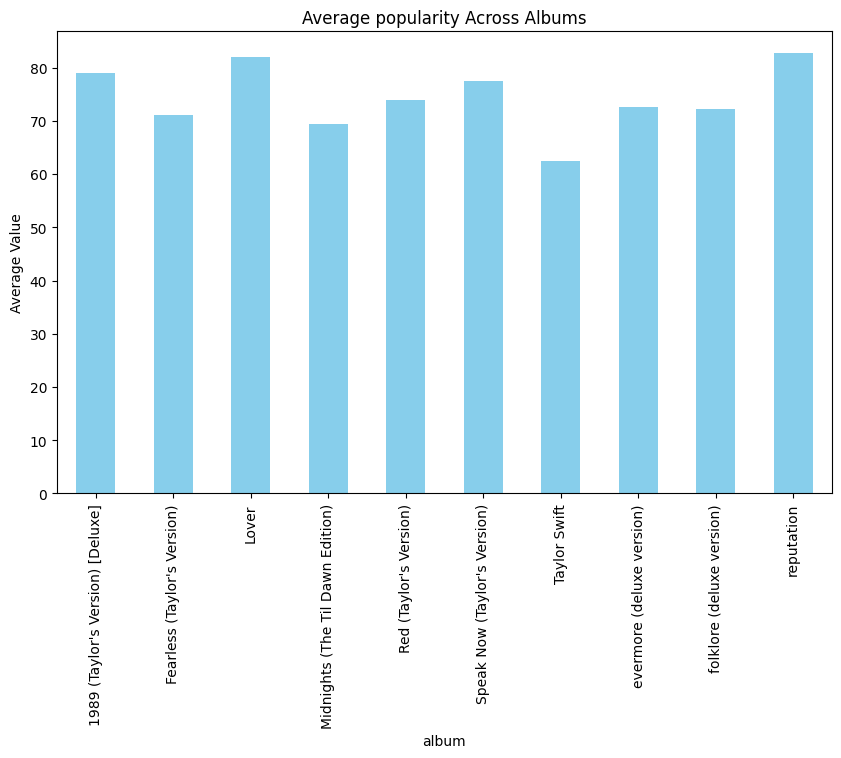

In [ ]:
def filter_duplicate_albums():

    data = pd.read_csv('taylor_swift_spotify.csv')
    data.head()

    # Data cleaning
    data["release_date"] = pd.to_datetime(data["release_date"])
    data["year"] = data["release_date"].dt.year
    
    standard_albums = ['Taylor Swift', "Fearless (Taylor's Version)", "Speak Now (Taylor's Version)", "Red (Taylor's Version)", "1989 (Taylor's Version) [Deluxe]", 'reputation', 'Lover', "folklore (deluxe version)", "evermore (deluxe version)", "Midnights (The Til Dawn Edition)"]
    
    standard_albums_data = data.loc[data['album'].isin(standard_albums)]
    
    return standard_albums_data

filtered_data = filter_duplicate_albums()

columns = filtered_data.columns[7:-2]

for c in columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Average {c} Across Albums')
    plt.ylabel('Average Value')  
    
    data_per_album = filtered_data.groupby('album')[c].mean()
    
    data_per_album.plot(kind='bar', color='skyblue')
    
    plt.show()

Much better! It's a lot easier to see patterns across albums now - for example, reputation has high speechiness compared to other albums because it has some rap in it.

Now that that's done, I want to analyze the songs from a different angle, using word embeddings. I'm starting off with the information I found in this article: https://towardsdatascience.com/lyric-based-song-recommendation-with-doc2vec-embeddings-and-spotifys-api-5a61c39f1ce2.

At the end, he says this: "On the other hand, lyric-based song embeddings could be just one small piece of a larger recommendation engine. The current application only uses the lyrics when searching for similar songs, but better recommendations would surely be achieved when taking into account the way a song sounds in addition to what it says." 

I think that's something we can try to do!

In [ ]:
from pathlib import Path
import re


albums = []
songs = []
lyrics = []

standard_albums = ['TaylorSwift', 'Fearless_TaylorsVersion_', 'SpeakNow', 'Red_TaylorsVersion_', '1989', 'Reputation', 'Lover', 'Folklore', 'Evermore', 'Midnights_TheTillDawnEdition_']

for dirname, _, filenames in os.walk('all_song_data/Albums'):
    album_name = os.path.split(dirname)[-1]
    if album_name in standard_albums:
        for filename in filenames:
            albums.append(album_name)
            songs.append(Path(filename).stem)

            with open(os.path.join(dirname, filename), 'r', encoding='utf-8') as f:
                raw_lyrics = f.read()
                
                # Clean up the lyrics by replacing non-standard characters
                raw_lyrics = raw_lyrics.encode('ascii', 'replace').decode().replace('?', ' ')
                raw_lyrics = raw_lyrics.replace('\n', ' ')
                raw_lyrics = re.sub('(?!\n)\s+', ' ', raw_lyrics)

                # Remove any words between brackets (Chorus, etc.)
                pattern = re.compile(r'\[.*?\]')
                # Use sub() method to replace matched patterns with an empty string
                raw_lyrics = re.sub(pattern, '', raw_lyrics)

                # Remove lyrics header
                raw_lyrics = re.sub('.*Lyrics', '', raw_lyrics)

                # Remove end characters (number + 'Embed' or number + 'KEmbed')
                raw_lyrics = re.sub('[0-9]+KEmbed', '', raw_lyrics)
                raw_lyrics = re.sub('[0-9]+Embed', '', raw_lyrics)
                
                lyrics.append(raw_lyrics)

df = pd.DataFrame({'Album': albums, 'Song': songs, 'Lyrics': lyrics})

print(df.head())

<>:24: DeprecationWarning: invalid escape sequence '\s'
<>:24: DeprecationWarning: invalid escape sequence '\s'
/var/folders/1q/w9trgw5553vb5f14fsvqbnl40000gp/T/ipykernel_46573/3590705741.py:24: DeprecationWarning: invalid escape sequence '\s'
  raw_lyrics = re.sub('(?!\n)\s+', ' ', raw_lyrics)


                      Album                                   Song   
0  Fearless_TaylorsVersion_        TheWayILovedYou_TaylorsVersion_  \
1  Fearless_TaylorsVersion_                Fifteen_TaylorsVersion_   
2  Fearless_TaylorsVersion_  DontYou_TaylorsVersion__FromtheVault_   
3  Fearless_TaylorsVersion_  TheOtherSideoftheDoor_TaylorsVersion_   
4  Fearless_TaylorsVersion_           JumpThenFall_TaylorsVersion_   

                                              Lyrics  
0   He is sensible and so incredible And all my s...  
1   You take a deep breath and you walk through t...  
2   Hey, I knew I'd run into you somewhere It's b...  
3   In the heat of the fight I walked away Ignori...  
4   I like the way you sound in the mornin' We're...  


In [ ]:
#Import the libraries for preprocessing, stemming, lemmatization, removing english stopwords & punctuations
import os
from pathlib import Path
import re
import string
import nltk
import zipfile
import os

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# # Specify the path to the WordNet zip file
# wordnet_zip_path = "/usr/share/nltk_data/corpora/wordnet.zip"

# # Specify the directory where you want to extract WordNet
# extracted_dir = "/usr/share/nltk_data/corpora"

# # Check if the zip file exists
# if os.path.exists(wordnet_zip_path):
#     # Create the directory if it doesn't exist
#     os.makedirs(extracted_dir, exist_ok=True)

#     # Unzip the WordNet package
#     with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extracted_dir)

#     print(f"WordNet has been successfully extracted to {extracted_dir}")
# else:
#     print(f"Error: WordNet zip file not found at {wordnet_zip_path}")
    
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()


from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

import string
exclude = set(string.punctuation)

#Create a single function to preprocess
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(wordnet_lemmatizer.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(line).split() for line in df['Lyrics']] 
print('clean', doc_clean[0:5])

clean [['sensible', 'incredible', 'single', 'friend', 'jealous', 'say', 'everything', 'need', 'hear', 'like', 'ask', 'anything', 'better', 'open', 'door', 'get', 'car', 'say', 'you', 'look', 'beautiful', 'tonight', 'feel', 'perfectly', 'fine', 'miss', 'screaming', 'fighting', 'kissing', 'rain', '2am', 'im', 'cursing', 'name', 'love', 'act', 'insane', 'thats', 'way', 'loved', 'breaking', 'coming', 'undone', 'rollercoaster', 'kind', 'rush', 'never', 'knew', 'could', 'feel', 'much', 'thats', 'way', 'loved', 'respect', 'space', 'never', 'make', 'wait', 'call', 'exactly', 'say', 'he', 'close', 'mother', 'talk', 'business', 'father', 'he', 'charming', 'endearing', 'im', 'comfortable', 'miss', 'screaming', 'fighting', 'kissing', 'rain', '2am', 'im', 'cursing', 'name', 'love', 'act', 'insane', 'thats', 'way', 'loved', 'breaking', 'coming', 'undone', 'rollercoaster', 'kind', 'rush', 'never', 'knew', 'could', 'feel', 'much', 'thats', 'way', 'loved', 'cant', 'see', 'smile', 'im', 'faking', 'heart

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/neetidesai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neetidesai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/neetidesai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Import the Gensim libraries
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)


#Create the corpora matrix
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]
#Initiate the model
Lda = gensim.models.ldamodel.LdaModel

num_topics = 20

#Fit the model with corpora matrix with dictionary for 20 topics
ldamodel = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=50)

#Check the results for 20 topics
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))
    
#Check the score for a random sentence (100th) in the book
example = doc_clean[100]
# print(example,'\n')
example_lda = dictionary.doc2bow(example)

for index, score in sorted(ldamodel[example_lda], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}\n".format(score, ldamodel.print_topic(index, 5)))

Topic: 0 Word: 0.028*"im" + 0.023*"time" + 0.020*"like" + 0.017*"know" + 0.017*"last" + 0.011*"asking" + 0.011*"think" + 0.011*"wanted" + 0.010*"one" + 0.009*"waiting"

Topic: 1 Word: 0.045*"ever" + 0.042*"oh" + 0.031*"never" + 0.020*"thats" + 0.015*"girl" + 0.015*"back" + 0.014*"id" + 0.014*"street" + 0.014*"together" + 0.013*"baby"

Topic: 2 Word: 0.036*"like" + 0.030*"call" + 0.020*"made" + 0.020*"want" + 0.019*"look" + 0.016*"time" + 0.014*"would" + 0.014*"im" + 0.014*"one" + 0.011*"could"

Topic: 3 Word: 0.045*"wish" + 0.031*"i" + 0.018*"time" + 0.017*"would" + 0.016*"like" + 0.014*"never" + 0.014*"im" + 0.013*"still" + 0.011*"know" + 0.010*"right"

Topic: 4 Word: 0.029*"like" + 0.029*"come" + 0.025*"oh" + 0.018*"im" + 0.018*"red" + 0.017*"on" + 0.016*"back" + 0.015*"know" + 0.013*"never" + 0.011*"night"

Topic: 5 Word: 0.045*"oh" + 0.037*"love" + 0.025*"ohoh" + 0.020*"thats" + 0.018*"like" + 0.013*"think" + 0.013*"finally" + 0.012*"cant" + 0.012*"thing" + 0.012*"im"

Topic: 6 Wor

In [ ]:
# can't get the following viz to work:

import pyLDAvis 
import pyLDAvis.gensim

# Get necessary data for pyLDAvis
topic_term_dists = ldamodel.get_topics()
doc_topic_dists = [ldamodel.get_document_topics(doc) for doc in corpus]
doc_lengths = [len(doc) for doc in doc_clean]
vocab = list(dictionary.token2id.keys())
term_frequency = [dictionary.dfs[word_id] for word_id in dictionary.dfs]


vis = pyLDAvis.gensim.prepare(topic_model = ldamodel, corpus=corpus, dictionary=dictionary)
                              
#                               , topic_term_dists=topic_term_dists, 
#                               doc_topic_dists=doc_topic_dists, 
#                               doc_lengths=doc_lengths,
#                              vocab=vocab,
#                              term_frequency=term_frequency)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis)

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0 good resource for qualitative testing of out-of-the-box NLP models